In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [35]:
def load_data():
    # Example data loading (replace with your actual data loading code)
    data = pd.read_csv('infy_stock.csv')
    return data


In [36]:
data = load_data()

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                248 non-null    object 
 1   Symbol              248 non-null    object 
 2   Series              248 non-null    object 
 3   Prev Close          248 non-null    float64
 4   Open                248 non-null    float64
 5   High                248 non-null    float64
 6   Low                 248 non-null    float64
 7   Last                248 non-null    float64
 8   Close               248 non-null    float64
 9   VWAP                248 non-null    float64
 10  Volume              248 non-null    int64  
 11  Turnover            248 non-null    float64
 12  Trades              248 non-null    int64  
 13  Deliverable Volume  248 non-null    int64  
 14  %Deliverble         248 non-null    float64
dtypes: float64(9), int64(3), object(3)
memory usage: 29.2+ KB

In [38]:
data.isna().sum()

Date                  0
Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
dtype: int64

In [39]:

data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2015-01-01,INFY,EQ,1972.55,1968.95,1982.00,1956.9,1971.00,1974.40,1971.34,500691,9.870306e+13,14908,258080,0.5154
1,2015-01-02,INFY,EQ,1974.40,1972.00,2019.05,1972.0,2017.95,2013.20,2003.25,1694580,3.394669e+14,54166,1249104,0.7371
2,2015-01-05,INFY,EQ,2013.20,2009.90,2030.00,1977.5,1996.00,1995.90,2004.59,2484256,4.979911e+14,82694,1830962,0.7370
3,2015-01-06,INFY,EQ,1995.90,1980.00,1985.00,1934.1,1965.10,1954.20,1954.82,2416829,4.724458e+14,108209,1772070,0.7332
4,2015-01-07,INFY,EQ,1954.20,1965.00,1974.75,1950.0,1966.05,1963.55,1962.59,1812479,3.557162e+14,62463,1317720,0.7270


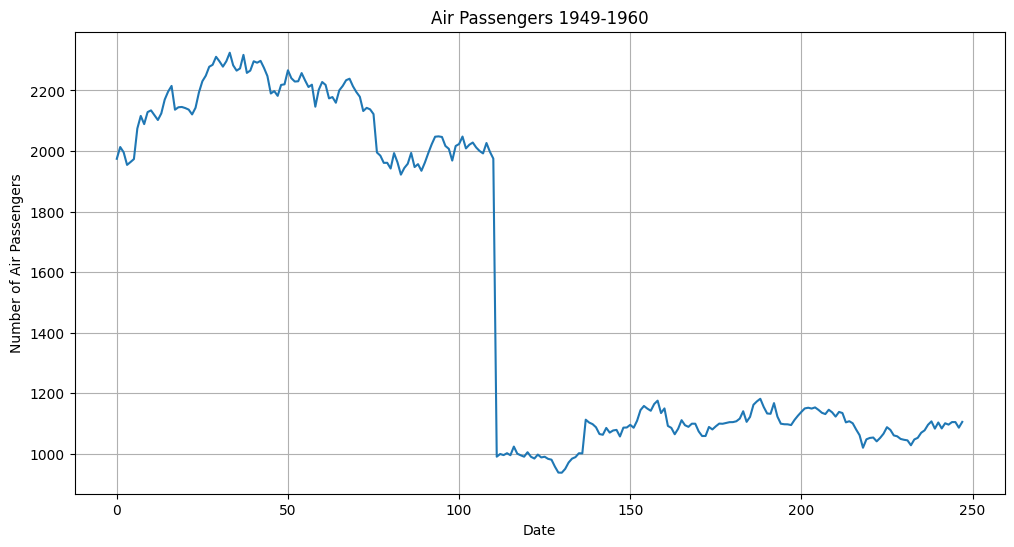

In [40]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(12, 6))
plt.plot(data['Close'])
plt.xlabel('Date')
plt.ylabel('Number of Air Passengers')
plt.title('Air Passengers 1949-1960')
plt.grid()
plt.show()

In [25]:
import numpy as np
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from statsmodels.tsa.arima.model import ARIMA
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.neural_network import MLPRegressor

In [64]:
x = data.drop(columns=['Close', 'Date', 'Symbol', 'Series'])  # Assuming 'Date', 'Symbol', 'Series' are not used as features
y = data['Close']

In [65]:
# Define machine learning models to test
models = {
    "Linear Regression": LinearRegression(),
    "Logistic Regression": LogisticRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "SVM": SVR(),
    "KNN": KNeighborsRegressor(),
    # ARIMA and K-Means won't fit in this dictionary
}

In [71]:
# Initialize time series cross-validator
tscv = TimeSeriesSplit(n_splits=5)
# Initialize variables to store best model and its score
best_model = None
best_score = float('inf')  # For regression models, lower is better

# Model Training and Evaluation Loop
for name, model in models.items():
    scores = []
    for train_index, test_index in tscv.split(x):
        X_train_cv, X_test_cv = x.iloc[train_index], x.iloc[test_index]
        y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]

        if "Regressor" in name:  # Regression models
            model.fit(X_train_cv, y_train_cv)
            y_pred_cv = model.predict(X_test_cv)
            score = mean_squared_error(y_test_cv, y_pred_cv)
            scores.append(score)
        elif "Classifier" in name:  # Classification models
            model.fit(X_train_cv, y_train_cv)
            y_pred_cv = model.predict(X_test_cv)
            score = accuracy_score(y_test_cv, y_pred_cv)
            scores.append(score)
        elif "K-Means" in name or "Hierarchical" in name:  # Clustering models
            model.fit(X_train_cv)
            score = silhouette_score(X_test_cv, model.labels_)
            scores.append(score)

    avg_score = np.mean(scores)
    print(f"{name}: Average Score: {avg_score}")

    if avg_score < best_score:  # For regression models, lower is better
        best_score = avg_score
        best_model = name

# Selecting the Best Model
print("\nBest Model:", best_model)
print("Best Model Average Score:", best_score)

Linear Regression: Average Score: nan
Logistic Regression: Average Score: nan
Lasso: Average Score: nan
Ridge: Average Score: nan
Decision Tree: Average Score: nan
Random Forest: Average Score: nan
Gradient Boosting: Average Score: nan
SVM: Average Score: nan
KNN: Average Score: nan

Best Model: None
Best Model Average Score: inf
